# **Housing Price Regression Problem**

In this document we will try to understand why the housing prices increases. 
We will do :
* Dividing data into train and test sets
* Applying Multiple Linear Regression
* Selecting a performance measure such as RMSE or MAE
* And at the end we come to a conclusion.

Now sit back, have your coffee. It will be fun, I promise.

In [1]:
#importing relevant libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#we will turn the excel to a data frame, most sacred form of information keeping in the whole coding world.
housing = pd.read_excel("housing.xlsx")

In [3]:
#looking at the first 5 rows. Just to be sure, you know.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462,342200.0,NEAR BAY


In [4]:
#now lets look at the data and what does it consist of
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  object 
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


Well we have a problem. As you can see *total_bedrooms* column only exists 20433 rows while all others are existing 20640. 
So we have *missing values* and we have to fix this. Another thing is **median_income** and **ocean_proxmity** column type is **object**. But in regression problems we cant have non-numeric values. 
median_income column should be integer actually but i think it just getconfused when I turned this to excel file. So will fix those two.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We see that ocean_proximity is actually a categorical variable. So we will turn this something that we can use in regression.
Because this data is not ordinal, which means we dont have a data that follows each other like 1,2,3.. etc. Hence, we will use one hot encoding to code this problem.


In [6]:
housing_en = pd.get_dummies(housing, columns=["ocean_proximity"],prefix_sep="cat")

for col in housing_en.filter(regex='^cat_').columns:
    housing_en[col] = housing_en[col].astype('float64')

In [7]:
housing_en.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximitycat<1H OCEAN,ocean_proximitycatINLAND,ocean_proximitycatISLAND,ocean_proximitycatNEAR BAY,ocean_proximitycatNEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462,342200.0,0,0,0,1,0


This is one of the ways to rearrange your data as it should be. Also you can use *scikit-learn* ordinal encoder. t is better when you have Machine Learning problem but this time i will so with what i am familiar, one hot encoder.

In [8]:
housing_en["median_income"] = pd.to_numeric(housing_en["median_income"],errors="coerce")

In [9]:
housing_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                20433 non-null  float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 19788 non-null  float64
 8   median_house_value            20640 non-null  float64
 9   ocean_proximitycat<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximitycatINLAND      20640 non-null  uint8  
 11  ocean_proximitycatISLAND      20640 non-null  uint8  
 12  ocean_proximitycatNEAR BAY    20640 non-null  uint8  
 13  o

Well we have more than one problems, because now i lost a high number of data in median_income. Which is one of the most important columns. So  think  will stop being a stubborn bitch and use csv file... it will ne hard to watch..

In [10]:
housing1 = pd.read_csv("housing.csv")

In [11]:
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Now everything is fine. I think my problem is my love to excel. We have kinda hate/love relationship and we are toxic but y'know girl.. this is the accepted type of relationship nowadays. Now i will stop critizing relationships and the unfortunate era that we live in and focus on to use csv files more than excel because excel is harmful to me. And also I don't know if you have the same feeling as me but excel is kinda a bad boy like in the wattpad books that most of the girls fell for and csv is just a regular guy who has one of the most adorable eyes and not a bad boy. So from now on i stop being a damsel in the distress and go with csv. My yappinf section is over, lets get to work.

In [12]:
housing1.info()
#now the only object is ocean_proximity. I will try to use scikit learn this time not the one hot encoder.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
from sklearn.preprocessing import OrdinalEncoder

data_to_encode = housing1[["ocean_proximity"]] #it should be 2d format!!!

encoder = OrdinalEncoder()

housing1["ocean_proximity_coded"] = encoder.fit_transform(data_to_encode).astype(np.float64)

In [14]:
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_coded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [15]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              20640 non-null  float64
 1   latitude               20640 non-null  float64
 2   housing_median_age     20640 non-null  float64
 3   total_rooms            20640 non-null  float64
 4   total_bedrooms         20433 non-null  float64
 5   population             20640 non-null  float64
 6   households             20640 non-null  float64
 7   median_income          20640 non-null  float64
 8   median_house_value     20640 non-null  float64
 9   ocean_proximity        20640 non-null  object 
 10  ocean_proximity_coded  20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [16]:
housing1["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

At first i did something very stupid.I didnt create a new column and I used the same name. I just handled it but I want to share with you because not all of us are Elon Musk or Steve Jobs because we dont have enough resources, rich parents and LUCK. And if you think I am being unreasonable with that **LUCK** part I reccomend you to read "Outliers". After that you will understand it better because now I try to learn coding in a small grocery shop in Turkiye, while Steve Jobs was using it in his middle school and highschool. So yes we are not the same because my dad had to leave school when he was 11 to provide his family and my mom did the same thing too. They were living somewhere that still int this age no electricity or proper water line is exsist. So stop whining OK?

In [17]:
housing1["ocean_proximity_coded"].value_counts()

0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: ocean_proximity_coded, dtype: int64

In [18]:
#And now we will go to inspect the dataset and try to be more quiet..

housing1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_coded
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


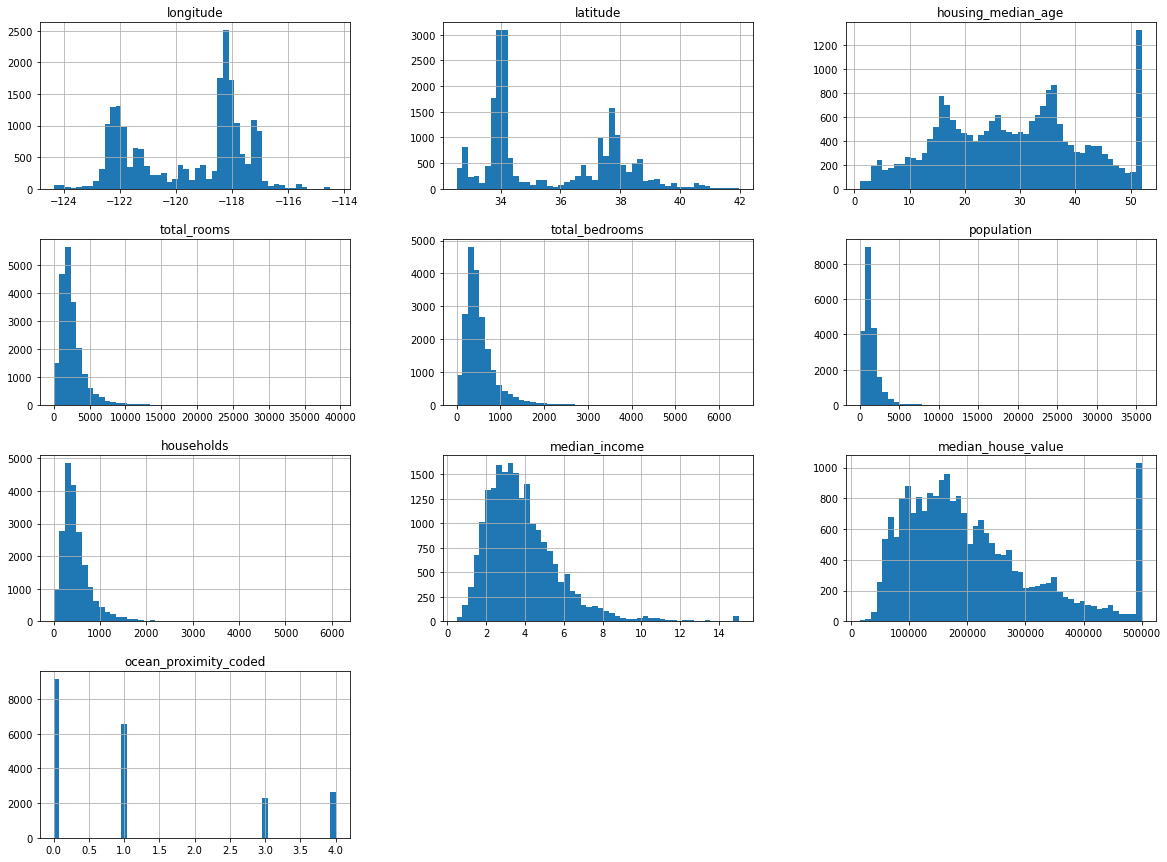

In [19]:
#Some people just dont like to read the tables and they just want to see whats going on here. So for this we will use
#graphs; plots, histograms etc..

%matplotlib inline
housing1.hist(bins=50,figsize = (20,15))
plt.show()

* Now I believe we can understand the data better. First of all there is exactly no bell shaped graph so we dont have a normal distribution. Which is the worst nightmare to a statistician / data analyst. When I look at this I see there is an outlier for sure because of the extreme value in madian_house_value and housing_median_age. I can see most of the columns are right skewed. Which means frequency of the data is mostly in the lower values. So this might be problem for the machine learning.

* Here another thing, median income value is expressed ind 1,2,3... well the reason is this data collected as tens of thousands dollars. So be cool dude, there's no home for 1 dollar because we dont live in 40s.

* One important part is all scales here are so different so we need to scale it later. 



In [20]:
 #Well well well.. Now we will divide data in two; test and train.. Oh they just grow so fast.. Look what we are 
#becoming. I am not crying guys, i am just a little bit emotional..
# Normally I would use train_test_split in sklearn but now we will try to do it with our OWN function 
#that we will be creating.

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [21]:
train_set, test_set = split_train_test(housing1,0.2)

In [22]:
len(train_set)

16512

In [23]:
len(test_set)

4128

Again.. we have a problem. And it is that as we keep running this code, ML starts to understand.. well well well.. We don't want this to be happen. So we can use one of the most important numpy attribute, which is np.random.seed(). This helps us to generate always the same shuffled indices. But both of this can cause to spoil our model with test data, which leads overfitting in general. So best way to avoid this problem is using hash of each instance's identifier and puttibng it to test set if has is lower or equal to 20%.

In [24]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [25]:
#but our data do not have an identifier column. we can solve this by turnin row index column to identifier.
housing_with_id = housing1.reset_index()

housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_coded
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [26]:
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [27]:
train_set.shape,test_set.shape

((16512, 12), (4128, 12))

Again, there is a problem. We always have problem as you can see because this is how the world revolves. Whatever, if new data comes then it should append to the end of the dataset, or the index number will be mixed up and this is someting we need to avoid. So in the dataset there is longitude and latitude columns, they are basically shows the coordinates of the houses and from my experience with reading history books coordinates do not have a habit to change minute by minute. They changes like after million years. So we can also use those coordinates as the id because you cant have 2 houses in the same coordinate. or can you?.. 

In [28]:
housing_with_id["id"] = housing_with_id["longitude"]*100* + housing_with_id["latitude"]

train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")

**ALLERT**
OK, now after we created our own functions its time to use sklearn.. I just love that library and my love for THAT particular one can not be expressed by words.. We can also use train_test_split function. It just do the things that our functions does and it also has a parameter that is called *random_state* !!!  Also, you can pass in it multiple datasets with identical shape and it will split them on same indices. ***HOW.COOL.IS.THAT?!!***

In [29]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing1,test_size=0.2,random_state=42)

Well, I used purely random sample because I have a huge data set that consist high number of rows. But what would happen if I have 1000 people that i will collect the data and they consist male and female. And lets say I am trying to understand whats goin on in a country that consist 56.2% female and 43.8% male; then we need to divide the sample as 562 females and 438 males. The population divided into homogenous subgroups called *strata*, and we do this to show the sample represent population correctly. If they use purely random sampling there would be a chance that almost like 13-14% that females chosen more or less. In both ways, the survey results would be *significantly biased.*

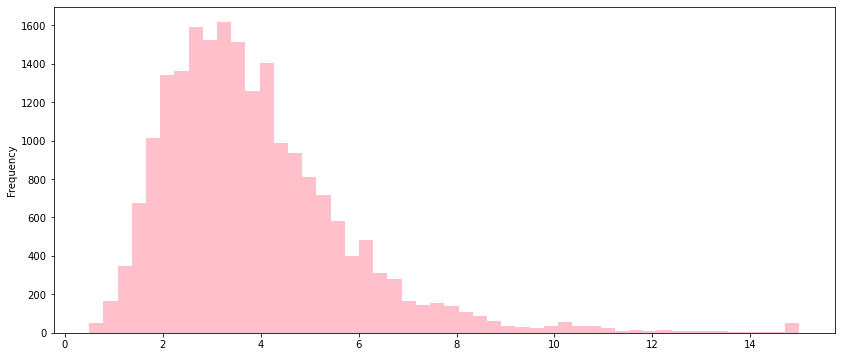

In [30]:
#most important column of this data is probably the median_income so lets take a closer look

housing1["median_income"].plot(kind="hist",bins=50,figsize=(14,6),color = "pink")
plt.show()

See, we have a problem. Most of the data centered around 25k and 60k dollars. But there is some outliers. We need sufficient number of instances for the stratums or the importance of stratums may have been biased. 

In [31]:
housing1["income_cat"] = pd.cut(housing1["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

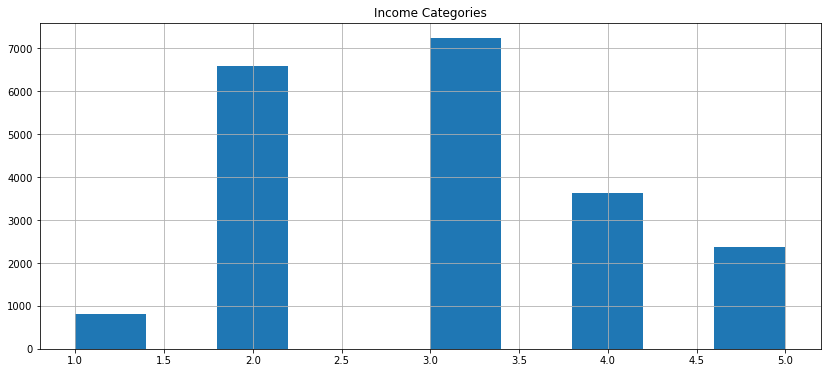

In [32]:
housing1["income_cat"].hist(figsize=(14,6))
plt.title("Income Categories")
plt.show()

In [33]:
#now we will use stratified sampling based on income category 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing1, housing1["income_cat"]):
    strat_train_set = housing1.loc[train_index]
    strat_test_set = housing1.loc[test_index]

In [34]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [35]:
#now we will compare random and stratified sampling
overall_proportions = housing1["income_cat"].value_counts() / len(housing1)

#stratified sample splits, I am wrigind the same one above to have full code you to understand whats going on
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index , text_index in split.split(housing1,housing1["income_cat"]):
    strat_train_index = housing1.loc[train_index]
    strat_test_index = housing1.loc[test_index]
    
#calculating stratified proportions

strat_proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

#calculating random proportions

from sklearn.model_selection import train_test_split
random_train_set, random_test_set = train_test_split(housing1,test_size=0.2)
random_proportions = random_test_set["income_cat"].value_counts() / len(random_test_set)

# now we will combine and format the data
compare_props = pd.DataFrame({
    "Overall": overall_proportions,
    "Random": random_proportions,
    "Stratified": strat_proportions
}).sort_index()

#and last part is calculating the percentage errors
compare_props["Rand. % error"] = (
    compare_props["Random"] / compare_props["Overall"] -1
)*100/100 #multipliying with 100 then dividing again with 100 because we want to have decimal format

compare_props["Strat. % error"] = (
    compare_props["Stratified"] / compare_props["Overall"] -1 
)*100/100

In [36]:
compare_props

,Overall,Random,Stratified,Rand. % error,Strat. % error
1,0.039826,0.039971,0.039971,0.003650,0.003650
2,0.318847,0.316618,0.318798,-0.006990,-0.000152
3,0.350581,0.346172,0.350533,-0.012576,-0.000138
4,0.176308,0.185804,0.176357,0.053861,0.000275
5,0.114438,0.111434,0.114341,-0.026249,-0.000847


Above table shows us that stratified sample errors are way much less than random sample errors. The reason wa sthe thing we had already discussed. We want to have stratified columns if there is significant difference like female and male, or the income levels. Those are differe from people to people and have this kind of samples are better because in this way we could have a test set that is represented by the whole population or train set. If test set is not a good representative of the population then our findings would be significantly biased.

In [37]:
#and we have to remove the income_cat attribute to have original format
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis = 1, inplace=True)

In [38]:
#now we will play with our train data to have better insights and we will visualize it.
housing_s = strat_train_set.copy()

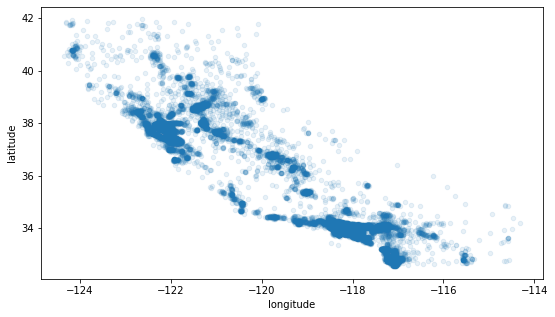

In [39]:
housing_s.plot(kind = "scatter",x="longitude", y= "latitude",figsize = (9,5),alpha = 0.1)
#alpha higlights the area that has more density than others. This data set consist of california house prices
#and due to this those areas are LA, San Diego, Cenrtal Valley etc..
plt.show()

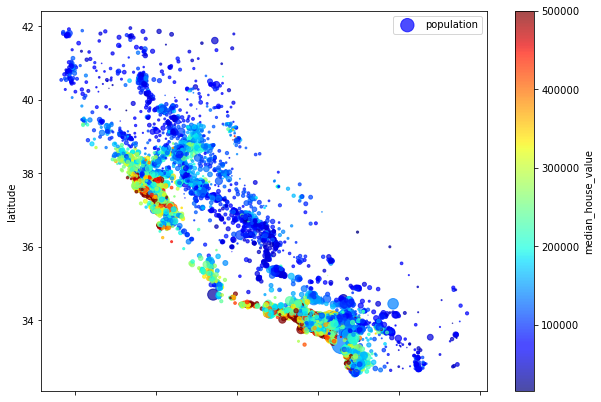

In [40]:
#now we will look for the house prices and see how it changes from place to place
housing_s.plot(kind = "scatter",x = "longitude",y="latitude",alpha = 0.7,
              s = housing_s["population"]/100,label = "population",figsize = (10,7), # s : marker size
              c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar = True) # c : color
plt.legend()
plt.show()

This image shows that housing prices are dependent mostly on location. And this is true for everywhere in the world. If you want an Eiffel view house you need to pay more or you want a house that is 1 km or less away from the ocean then again, you have to pay way much more. So it would be better if we can create cluster based on the location and add a few more features like the age of the building, the schools in the district, security measures etc..

In [41]:
#lets take a look at the correlations

corr_matrix = housing_s.corr()

In [42]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.687151
total_rooms              0.135140
housing_median_age       0.114146
ocean_proximity_coded    0.076936
households               0.064590
total_bedrooms           0.047781
population              -0.026882
longitude               -0.047466
latitude                -0.142673
Name: median_house_value, dtype: float64

This correlation matrix tells us that the most related column(a.k.a positive correlation) to median house value is median income and can you say that this suprised you? I mean it didnt suprised me. Whatevs, then we see that there is negative correlation between location. This says as we go north, median house value decreases. So positive correlation means as something increases another thing also increase. And if something increase and at the same time another thing decrease then this si negative correlation. 
* If correlation is close to 1 -> positive correlation
* If correlation is close to -1 -> negative correlation
* If correlation is around 0 -> no correlation
**!!! Important Point***
Correlation ***does not assume CAUSALITY***.
And also correlation is only for **linear relations**.

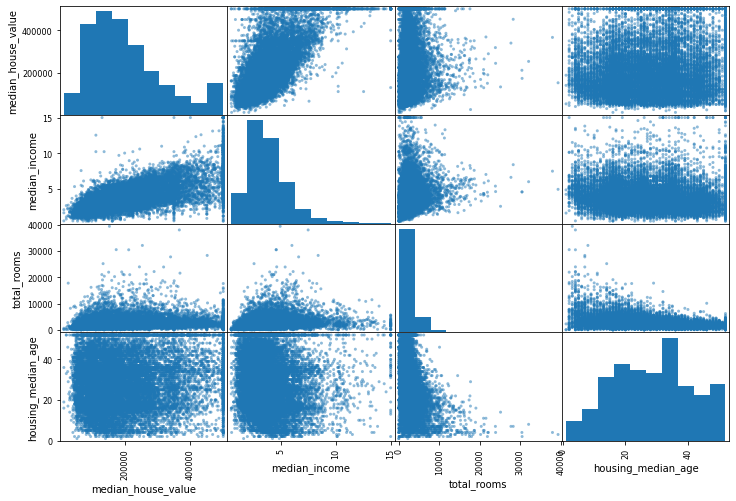

In [43]:
# Sometimes its hard to say there is correlation or not when you have a table. The best way to understand it more 
#clearly is to visualize the data. With this way people wo are not in this data science/analysis field also can
#undertand.

from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing_s[attributes],figsize = (12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

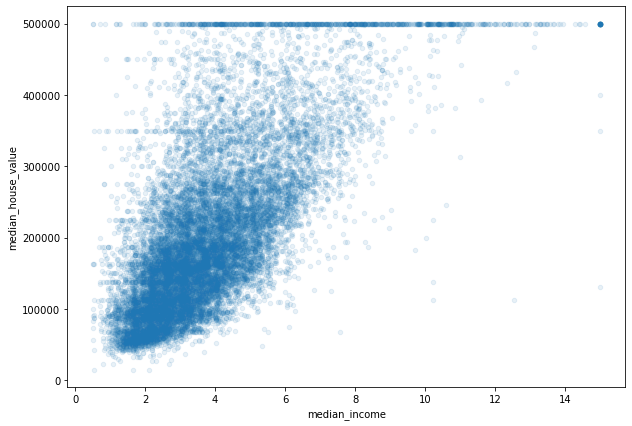

In [44]:
#lets take a deep dice into the the relation between median house price and median income

housing_s.plot(kind = "scatter",x = "median_income",y= "median_house_value",alpha = 0.1,figsize = (10,7))

We see there is a positive relation but also we see that around 200k-300k-500k horizontal lines. We may clean this, or maybe there are another attributes that may have resulted this situation. Hence, we can use clusters too.

In [45]:
#sometimes we need to do some feature engineering, we have to create different columns to
#have more understanding power. For example total numbers of rooms do not have that much explaining power 
#but if we combine this with households this can help us. Or the same thing with bedroom numbers, 
#you probably want to compare it with number of rooms.

housing_s["rooms_per_household"] = housing_s["total_rooms"] / housing_s["households"]

housing_s["bedrooms_per_room"] = housing_s["total_bedrooms"] / housing_s["total_rooms"]

housing_s["population_per_household"] = housing_s["population"] / housing_s["households"]


In [46]:
corr_matrix1 = housing_s.corr()

corr_matrix1["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
ocean_proximity_coded       0.076936
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

This is what I love about playing with the fire ır another synonym of it -> data. In this table we see that bedroom to room ratio is way much correlated than both total rooms or bedrooms column. Also it has a negative sign, houses with lower bedroom/room ratio tend to be more expensive. Also rooms_per_household is positive and more informative than total rooms. This indicates that larger houses are more expensive. 

In [47]:
#preparing data for the machine learning algoritms

housing_ml = strat_train_set.drop("median_house_value",axis = 1)

housing_labels = strat_train_set["median_house_value"].copy()

In [48]:
#from above we see that total_bedrooms variable has some missing values. we can handle them easily with
#housing_ml.dropna(subset=["total_bedrooms"])
#housing_ml.drop("total_bedrooms",axis=1)
#median = housing_ml["total_bedrooms"].median()
#housing_ml["total_bedrooms"].fillna(median,inplace = TRUE)

In [49]:
#but why bother with those when we have sklearn?? we can use simpleimputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing_ml.drop("ocean_proximity",axis = 1) #we have to drop this because its not a numerical value

imputer.fit(housing_num)

imputer.statistics_

array([-1.18510e+02,  3.42600e+01,  2.90000e+01,  2.11900e+03,
        4.33000e+02,  1.16400e+03,  4.08000e+02,  3.54155e+00,
        1.00000e+00])

In [50]:
housing_num.median().values

array([-1.18510e+02,  3.42600e+01,  2.90000e+01,  2.11900e+03,
        4.33000e+02,  1.16400e+03,  4.08000e+02,  3.54155e+00,
        1.00000e+00])

In [51]:
#now we will use the trained imputer to transform the trainin set by replacing missing values with learned medians
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_coded
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0


In [53]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              16512 non-null  float64
 1   latitude               16512 non-null  float64
 2   housing_median_age     16512 non-null  float64
 3   total_rooms            16512 non-null  float64
 4   total_bedrooms         16512 non-null  float64
 5   population             16512 non-null  float64
 6   households             16512 non-null  float64
 7   median_income          16512 non-null  float64
 8   ocean_proximity_coded  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [54]:
housing_cat = housing_s[["ocean_proximity"]]

In [55]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [56]:
#we can convert this categories to numbers so our machine can understand it
#there is various ways to do this so lets start with ordinal encoder

#import the OrdinalEncoder library
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

#encode the categorical column

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [57]:
#lets look at the list of the categorical variables
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

That was nice, however we still have a problem. Here the 0 corresponds to <1H OCEAN, but 4 means NEAR OCEAN. ML algorithms would think that 0 and 1 should be more related but here our column does not have actually ordinal presentaion when we look at the categories. So best way to solve this problem is using one hot encoder instead of Ordinal Encoder.

**OneHotEncoder** is kind of creating dummy variables. For example when the house is classified as INLAND, then the inland column will be 1 and all other columns will be 0. 

In [58]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#this is not a numpy array, its a scipy sparse matrix. This saves us space.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [59]:
#if you want to convert it to numpy array 
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [60]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
housing_with_id.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_coded', 'id'],
      dtype='object')

In [62]:
#yes sklearn is good but what its cool y'know? creating your own class
#and now we will create our class to have more combined attributes

#start with importing related libraries
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_with_id.values)

**Feature Scaling**


ML Algorithms do not do well when we have different scales in the data. And to prevent this. In the data total bedrooms has the min of 6 and max of 39320, so this causes a problem because median incomes range from 0 to 15. To have the same scales we can use min-max scaling (normalization) and standardization. 


* *Normalization* : values shifted and rescaled to 0 to 1. We do it like (x-min)/(max-min). We have MinMaxScaling() feature in sklearn.


* *Standardization* : it is a statistical tool and with that we substract the mean value and it divides by the standard deviation. Unlike min-max scaling here we dont have a bound value. So this causes problems for algorithms like neural networks because NN generally waits for 0 to 1. But it do not get affected by outliers like normalization. We also have a feature that is called StandardScaler() in sklearn.

In [64]:
housing_s["total_rooms"].describe()

count    16512.000000
mean      2622.539789
std       2138.417080
min          6.000000
25%       1443.000000
50%       2119.000000
75%       3141.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [65]:
#first we have a pipeline which already is in sklearn to conduct this standardization process

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler()) #last transformer should have fit_transform() method
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
#now its better combine categorical dn numerical columns together.

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing_s)

In [67]:
#now its time to train and evaluate the training set

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [68]:
#we have the model lets look if it wa good or not??

some_data = housing_s.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:",lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 86424. 305248. 152952. 185600. 245384.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [69]:
#lets look for RMSE
#quick-note -> RMSE : it is average magnitude of the prediction errors,this is basically how far the real values
#and the predicted values from each other.

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68727.530331536

**Linear Regression**

This algorithm do not fit our data because the rmse is almost lik 70k, so average magnitude of prediction errors from the real values is so high when we look at that most of the data range between 120k and 265k. The reason that linear regression do not works well because it has some regression diagnostics like multicorrelation, heteroscedasticity, model specification problems and autocorrelation. So we have to move to a stronger model like *Decision Trees*. 

In [70]:
#decision tree -> more capable than linear regression to find complex non-linear relationships.
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [71]:
#evaluating the model
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)

tree_mse

0.0

A model with 0 error? Am I in heaven???? Well, actually no. Our linear regression model was the case like what happens when we have underfitting and this decision tree is the another version, it is the answer of what happens if we have overfitting. Both cases are undesirable. So we cant touch the test data unless we have a good model. We will keep going.

To evaluate decision tree model would probably be to use the train_test_split so we split the trainin set into train and validation sets. So we will train our data wtih respectively smaller train set and validate it against the validation set. The main aim here is to see if our model will be doing good on test set. 

In [72]:
#we have to import sklearns cross validation feature
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv = 10)
                        #this code randomly splits the training set into 10 distinct subsets that are called folds
    #it trains and evaluates decision tree model 9 times and 10th array is the evaluation scores.

tree_rmse_scores = np.sqrt(-scores)
    

In [73]:
#lets look at the results

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("St. Deviation:",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [73189.75529117 71146.0905498  68914.88684951 71171.58035734
 67618.87890891 77972.39663421 71050.40693611 74953.0054854
 68270.3054623  71729.52661076]
Mean: 71601.68330855024
St. Deviation: 2987.1693715710508


**Here is a hot takeaway** : DecisionTree model even performs worse than the Linear Regression model. So data is so overfitted that this problem occurs. The ML's aim is to find the best model by trial and error model. So we have to try models and then we choose the better perfoming one. 

*Another point* 

Using validation set is good because we can understand whats going on and we are not using the test set so the machine has no idea but training the nodel several times is not always possible.

In [74]:
#linear regression model cross val
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71923.27342035 64251.48322112 67871.20070028 68780.10918621
 66891.7838369  72657.34248883 74628.59966546 68957.24115839
 66594.29953611 70202.50508761]
Mean: 69275.78383012603
St. Deviation: 2973.096313610534


In [75]:
#Its time to use a different model which is Random forest regressor

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

#fitting the model
forest_reg.fit(housing_prepared,housing_labels)

#predicting the model
forest_prediction = forest_reg.predict(housing_prepared)

#finding the mean_squared_errors to evaluate the model
forest_mse = mean_squared_error(housing_labels,forest_prediction)
forest_rmse = np.sqrt(forest_mse)

#cross-validate the model
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                               scoring="neg_mean_squared_error",cv=10)

#finding the mean
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51269.39612179 48743.04295677 46514.24209789 51699.15163674
 47378.59452807 51655.14207251 52739.44683701 50004.5772703
 48663.74029216 53413.29601841]
Mean: 50208.06298316475
St. Deviation: 2198.819262203738


From here we tried 3 different models and the best one was the RandomForestRegressor. We should always use different models and find the best one. After finding "it" we have to fine tune it, in other ways we have to find the best version of it with GridSearchCV.

In [76]:
from sklearn.model_selection import GridSearchCV

#writing the hyperparameters
param_grid = [
    {'n_estimators':[3,10,30],'max_features': [2,4,6,8]},
    {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]}
    
]

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Above the code we see that at first the elements are 3 and 4, so the grid will work as much 3 x 4 = 12 times. At the second part it will work as 2 x 3 = 6 times.At total grid search just explored 18 combinations of RandomForestRegressor values.

**Do not forget** that we had 5 cross validation set, so this means there would be 18 x 5 = 90 rounds of training.

In [77]:
#to get the best parameters
grid_search.best_params_
#maybe we can try higher numbers because the best estimators are 8 and 30.

{'max_features': 6, 'n_estimators': 30}

In [78]:
cvres=grid_search.cv_results_

for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63985.47460028311 {'max_features': 2, 'n_estimators': 3}
55404.46021973291 {'max_features': 2, 'n_estimators': 10}
52612.641004042795 {'max_features': 2, 'n_estimators': 30}
59981.55649728458 {'max_features': 4, 'n_estimators': 3}
52421.69353066519 {'max_features': 4, 'n_estimators': 10}
50434.627016286744 {'max_features': 4, 'n_estimators': 30}
59423.18066776463 {'max_features': 6, 'n_estimators': 3}
52148.57852080777 {'max_features': 6, 'n_estimators': 10}
49769.09541984973 {'max_features': 6, 'n_estimators': 30}
58863.37396254227 {'max_features': 8, 'n_estimators': 3}
52112.94461773325 {'max_features': 8, 'n_estimators': 10}
49955.5792816738 {'max_features': 8, 'n_estimators': 30}
61942.07323413922 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53974.21703013471 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60488.72884923579 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52743.56852327656 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

When we are exploring a few combinations, it is ok to use GridSearchCV. But when hyperparameter search space is high the using **RandomizedSearchCV** instead. Its better to use random combinations than to tring all possible combinations.This approach will explore different values for each hyperparameter. And also we would have more control over computing budget simply by setting the number of iterations.

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.24836841e-02, 6.93030675e-02, 3.90173516e-02, 1.96380969e-02,
       1.65472713e-02, 1.70188714e-02, 1.63526226e-02, 3.24295613e-01,
       1.84039153e-02, 6.06297015e-02, 1.06114774e-01, 7.01936200e-02,
       1.01186111e-02, 1.43048992e-01, 5.36895342e-05, 3.92942413e-03,
       2.85069378e-03])

In [80]:
#we will try to understand the relevance and importance of the attributes in the model
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"] #defining new features
cat_encoder = full_pipeline.named_transformers_["cat"] 
cat_one_hot_attribs = list(cat_encoder.categories_[0]) #getting the name of categorical attributes
attributes = num_attribs + extra_attribs + cat_one_hot_attribs #creating the final list

sorted(zip(feature_importances,attributes),reverse=True) #pairing and sorting the importances

[(0.3242956132297748, 'median_income'),
 (0.14304899215393047, 'INLAND'),
 (0.10611477395273688, 'pop_per_hhold'),
 (0.08248368411302448, 'longitude'),
 (0.07019361996241172, 'bedrooms_per_room'),
 (0.06930306754410492, 'latitude'),
 (0.06062970152918193, 'rooms_per_hhold'),
 (0.03901735158795896, 'housing_median_age'),
 (0.019638096883764503, 'total_rooms'),
 (0.018403915282795676, 'ocean_proximity_coded'),
 (0.01701887135825648, 'population'),
 (0.01654727125448222, 'total_bedrooms'),
 (0.016352622577599295, 'households'),
 (0.010118611125574465, '<1H OCEAN'),
 (0.0039294241291226335, 'NEAR BAY'),
 (0.0028506937811302218, 'NEAR OCEAN'),
 (5.368953415044816e-05, 'ISLAND')]

Above we see that some of the attributes are not useful while someof them like ocean_proximity are highly important to predict the house prices.

In [81]:
#the grand finale : evaluating our model with test set

final_model = grid_search.best_estimator_ #retrieves the best model found, in our case the model that has 8 features 
                                          #and 30 n_estimators

X_test = strat_test_set.drop("median_house_value",axis=1) #creating feature matrix by taking the stratified sample
y_test = strat_test_set["median_house_value"].copy() #creating target vector

X_test_prepared = full_pipeline.transform(X_test) #full pipeline implied to X_test data and we only used transform fn 
                                                  # because because if we use fit method this can cause data leakage

final_predictions = final_model.predict(X_test_prepared) #this is the models output.

final_mse = mean_squared_error(y_test,final_predictions) 
final_rmse = np.sqrt(final_mse) #we then find the rmse. the reason we use this because it has the same unit as
                                #the target variable so we can interpret our findings better than the mse.

In [82]:
final_rmse

47242.091734048896

So our final estimation is 47k$, which is lower than all of our training algorithms. But still so high. However, this is the best we have so we will keep roling with it. Now the last step is to have an idea of how precise the estimate is and for this we need to compute a confidence interval with scipy.


In [83]:
from scipy import stats

confidence = 0.95 
squared_error = (final_predictions-y_test)**2

np.sqrt(stats.t.interval(confidence,len(squared_error)-1,
                        loc=squared_error.mean(),
                        scale = stats.sem(squared_error)))

array([45337.75541941, 49072.58293942])

Due to those result, our model has an error between 45337.75 and 49072.58. Not bad because it was very close to our estimation of above the 47242.09. Our model is kinda reliable, but to have better models we have alwaysneed to try out different models and different hyperparameters. Hence, not to train with always hyperparameters to avoid overfitting and data leakage problems. For now, we good. See you later with different sets and different problems.

In [84]:
import pandocfilters